# 1. Settings

In [1]:
import sys
from qutip_simulation_functions import *
import numpy as np
import qutip as qt
import scipy.signal as sp

%matplotlib inline

In [2]:
nq = 10
g = qt.basis(nq,0)
e = qt.basis(nq,1)
f = qt.basis(nq, 2)
h = qt.basis(nq, 3)

psi0 = g

b = qt.destroy(nq)

qubit_x = b + b.dag()
qubit_y = -1j * (b - b.dag())
qubit_z = 2 * b.dag() * b - qt.qeye(nq)
g_state_projector = g * g.dag()
e_state_projector = e * e.dag()
f_state_projector = f * f.dag()

e_ops = [qubit_x, qubit_y, qubit_z, g_state_projector, e_state_projector, f_state_projector]
c_ops = []

In [3]:
h_bar = 1
# qubit_frequency_ghz = 2 * np.pi * 5
alpha_ghz = 2 * np.pi * 0.2

transmon_hamiltonian = - h_bar * alpha_ghz / 2 * b.dag() * b.dag() * b * b

In [4]:
def pi_pulse_generator(sigma, length):
    gauss_waveform = sp.gaussian(length*10, sigma*10)
    area = np.trapz(gauss_waveform)
    pi_pulse = np.pi * gauss_waveform / (area)
    return pi_pulse

In [5]:
def plot_population(tlist, p_list):
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(tlist, p_list[0])
    ax.plot(tlist, p_list[1])
    ax.plot(tlist, p_list[2])
    ax.legend(("g","e","f"))
    ax.set_title("Qubit State Population")
    plt.xlabel("Time[ns]")

ValueError: The length of `y` along `axis`=0 doesn't match the length of `x`

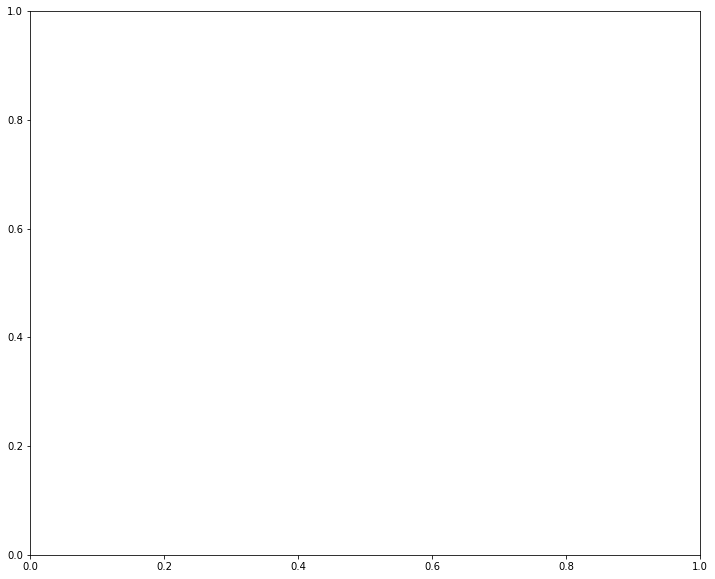

In [8]:
pulse_sigma_ns = 5
pulse_length_ns = 6 * pulse_sigma_ns

tlist = np.linspace(0, pulse_length_ns*10, pulse_length_ns*10)
omega_100_ns = pi_pulse_generator(pulse_sigma_ns, pulse_length_ns)
H_100_ns = driven_hamiltonian(omega=omega_100_ns, free_hamiltonian=transmon_hamiltonian, qubit_x = qubit_x, qubit_y = qubit_y, plot=True)
res = qt.mesolve(H_100_ns,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=True))
bvec_array = [res.expect[0],res.expect[1],res.expect[2]]
plist = [res.expect[3], res.expect[4], res.expect[5]]
plot_bloch_vector_component(tlist=tlist, bloch_array=bvec_array)
plot_population(tlist=tlist, p_list=plist)
print("X Gate Fidelity: ", plist[1][-1])

In [ ]:
pulse_sigma_ns = 1
pulse_length_ns = 6 * pulse_sigma_ns

tlist = np.linspace(0, pulse_length_ns,100)
omega_100_ns = pi_pulse_generator(pulse_sigma_ns, pulse_length_ns)
H_100_ns = driven_hamiltonian(omega=omega_100_ns, free_hamiltonian=transmon_hamiltonian, qubit_x = qubit_x, qubit_y = qubit_y, plot=True)
res = qt.mesolve(H_100_ns,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=True))
bvec_array = [res.expect[0],res.expect[1],res.expect[2]]
plist = [res.expect[3], res.expect[4], res.expect[5]]
plot_bloch_vector_component(tlist=tlist, bloch_array=bvec_array)
plot_population(tlist=tlist, p_list=plist)
print("X Gate Fidelity: ", plist[1][-1])